4.2 손실 함수
<br><br>
4.2.1 평균 제곱 오차

In [ ]:
import numpy as np

def mean_squared_error(y, t):
  return 0.5*np.sum((y-t)**2)

In [ ]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [ ]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

4.2.2 교차 엔트로피 오차

In [ ]:
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t*np.log(y + delta))

In [ ]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [ ]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

4.2.3 미니배치 학습

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) =\
  load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000, 10)


In [ ]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [ ]:
np.random.choice(60000, 10)

array([53847,  5435, 41053, 18910,  1736, 11904, 50794,  1855, 33934,
        1689])

4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [ ]:
# 정답 레이블이 원-핫 인코딩일 경우
def cross_entropy_error(y, t):
  if y.dim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t*np.log(y+1e-7)) / batch_size 

In [ ]:
# 정답 레이블이 숫자 레이블로 주어졌을 경우
def cross_entropy_error(y, t):
  if y.dim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t]+1e-7)) / batch_size 

4.3 수치 미분
<br><br>
4.3.1 미분

In [ ]:
# 나쁜 구현의 예
def numerical_diff(f, x):
  h = 10e-50
  return (f(x+h)-f(x)) / h

In [ ]:
np.float32(1e-50)

0.0

문제점
1. 반올림 오차
2. 진정한 미분과의 차이
  - 진정한 미분 : x 위치의 함수 기울기
  - 위 코드 : (x+h)와 x사이의 기울기
  - h를 무한히 0으로 좁히는 것이 불가능해서 생기는 문제

In [ ]:
# 개선
def numerical_diff(f, x):
  h = 1e-4 # 0.0001
  return (f(x+h)-f(x-h)) / (2*h)

4.3.2 수치 미분의 예
<br>
$$y = 0.01x^2 + 0.1x$$

In [ ]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

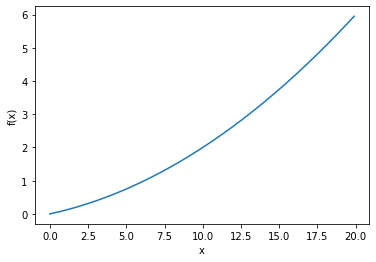

In [ ]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [ ]:
# x = 5일때 미분
numerical_diff(function_1, 5)

0.1999999999990898

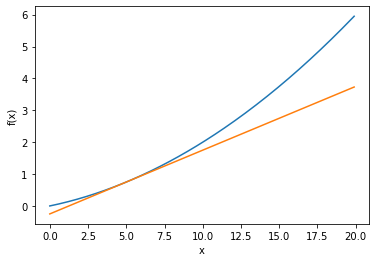

In [ ]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    # print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)

plt.show()

In [ ]:
# x = 10일때 미분
numerical_diff(function_1, 10)

0.2999999999986347

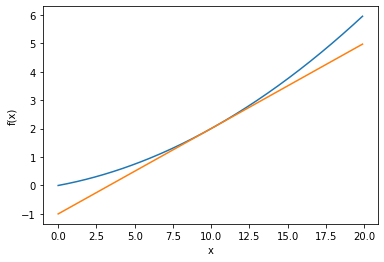

In [ ]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 10)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)

plt.show()

4.3.3 편미분

In [ ]:
def function_2(x):
  return x[0]**2 + x[1]**2
  # or return np.sum(x**2)

In [ ]:
def function_tmp1(x0):
  return x0**2 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [ ]:
def function_tmp2(x1):
  return 3.0**2.0 + x1**2

numerical_diff(function_tmp2, 4.0)

7.999999999999119

4.4 기울기

In [ ]:
# 모든 변수의 편미분을 벡터로 정리한 것 : 기울기

# f : 함수, x : 넘파이 배열
def numerical_gradient(f, x):
  h = 1e-4 # 0.0001
  grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

  for idx in range(x.size):
    tmp_val = x[idx]
    # f(x+h) 계산
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x-h)
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val # 값 복원

  return grad

In [ ]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [ ]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [ ]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

4.4.1 경사법(경사하강법)

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x
  
  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr*grad
  return x

In [ ]:
def function_2(x):
  return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [ ]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [ ]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

4.4.2 신경망에서의 기울기

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2, 3) # 정규분포로 초기화

  def predict(self, x):
    return np.dot(x, self.W)

  # x : 입력 데이터, t : 정답 레이블
  def loss(self, x, t): 
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)

    return loss

In [ ]:
net = simpleNet()
print(net.W)

[[-0.74549938  0.18164534 -0.02504939]
 [-0.84750005 -0.78345909 -0.13565151]]


In [ ]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))

[-1.21004967 -0.59612598 -0.13711599]
2


In [ ]:
t = np.array([0, 0, 1])
net.loss(x, t)

0.6800174945092119

In [ ]:
def f(W):
  return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.10395708  0.19207805 -0.29603512]
 [ 0.15593562  0.28811707 -0.44405269]]


In [ ]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.10395708  0.19207805 -0.29603512]
 [ 0.15593562  0.28811707 -0.44405269]]


4.5 학습 알고리즘 구현하기
<br><br>
4.5.1 2층 신경망 클래스 구현하기

In [ ]:
# two_layer_net.py

import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    self.params = {} # 신경망의 매개변수 보관
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1) # 활성화 함수
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2) # 출력층 활성화 함수

    return y

  # x : 입력 데이터, t : 정답 레이블
  def loss(self, x, t):
    y = self.predict(x)

    return cross_entropy_error(y, t)

  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1) # 각 원소에 대한 가장 큰 값에 대한 인덱스 반환
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0])
 
  # x : 입력 데이터, t : 정답 레이블
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)

    grads = {} # 기울기 보관
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

In [ ]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [ ]:
# 예측 처리
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
y = net.predict(x)

In [ ]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10) # 더미 정답 레이블(100장 분량)

grads = net.numerical_gradient(x, t) # 기울기 계산

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


4.5.2 미니배치 학습 구현하기

In [ ]:
import numpy as np
from dataset.mnist import load_mnist
# from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
  load_mnist(normalize=True, one_hot_label=True)

# 하이퍼파라미터
iters_num = 10000 # 반복횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 기울기 계산
  print('기울기 계산')
  grad = network.numerical_gradient(x_batch, t_batch)
  # gard = network.gradient(x_batch, t_batch)

  # 매개변수 갱신
  print('매개변수 갱신')
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  # 학습 경과 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  # 1에폭당 정확도 계산
  if i % iter_per_epoch == 0:
    print('epoch')
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc : "+str(train_acc)+", "+str(test_acc))